## First we need to load some things

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Shape_Maker import Data_Generator, make_rectangle, make_circle

Using TensorFlow backend.


In [2]:
%matplotlib notebook

In [69]:
image_size = 64

## The make_rectangle and make_circle will both return circles and rectangles, and the Data_Generator will randomly create circles or rectangles

<IPython.core.display.Javascript object>


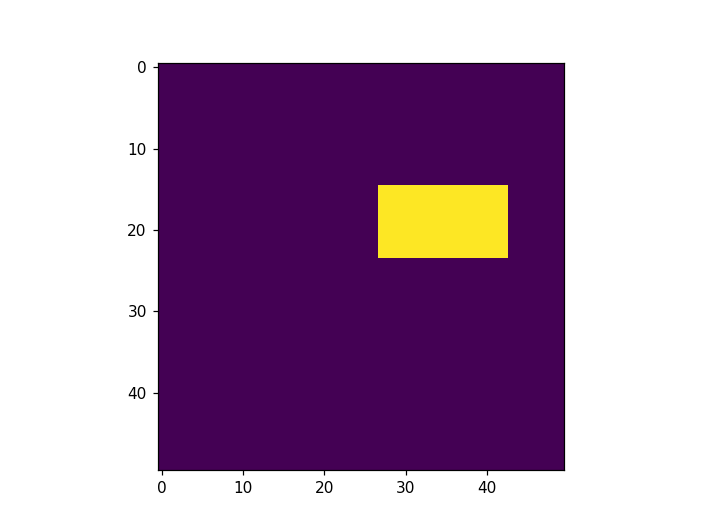

In [36]:
plt.imshow(make_rectangle(image_size))

In [ ]:
plt.imshow(make_circle(image_size))

## What do we need? We need a way to generate larges amounts of training data for our model..

### This is a 'generator', it is something which continously creates data

In [50]:
train_generator = Data_Generator(image_size=image_size,batch_size=64, num_examples_per_epoch=100)

In [38]:
x,y = train_generator.__getitem__(0)
print(x.shape)
print(y.shape)

(32, 50, 50, 1)
(32, 2)


### X will be out data set, this will have a size [64 , 50, 50, 1]
This is 64 examples, of a 50x50 image, with 1 channel
### Y is our output class, we have two classes: box and not box, so a shape of [64, 2]

## Now lets make our network!

In [39]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Activation
from keras.optimizers import Adam

In [79]:
model = Sequential([
    Conv2D(4, (3,3), input_shape=(image_size, image_size, 1), padding='same'), # Make 4 kernels,
    MaxPool2D((image_size)), # Pool into a 1x1x6 image
    Flatten(),
    Dense(2),
    Activation('softmax')
])

In [80]:
model.compile(Adam(lr=1e-1), loss='categorical_crossentropy', metrics=['accuracy'])

In [81]:
model.fit_generator(train_generator,epochs=5)

Epoch 1/5
100/100 [==============================] - 2s 17ms/step - loss: 0.1125 - acc: 0.9509
Epoch 2/5
100/100 [==============================] - 1s 14ms/step - loss: 0.0011 - acc: 1.0000
Epoch 3/5
100/100 [==============================] - 1s 14ms/step - loss: 4.9439e-04 - acc: 1.0000
Epoch 4/5
100/100 [==============================] - 1s 14ms/step - loss: 3.3090e-04 - acc: 1.0000
Epoch 5/5
100/100 [==============================] - 1s 15ms/step - loss: 1.9053e-04 - acc: 1.0000


In [46]:
def determine_accuracy(model, num_examples=500):
    truth = np.zeros((num_examples,1))
    guess = np.zeros((num_examples,1))
    index = 0
    for _ in range(num_examples//2):
        pred = model.predict(make_rectangle()[None,...,None])
        guess[index] = np.argmax(pred)
        truth[index] = 1
        index += 1
    for _ in range(num_examples//2):
        pred = model.predict(make_circle()[None,...,None])
        guess[index] = np.argmax(pred)
        index += 1
    print('Accuracy is ' + str((guess==truth).sum()/num_examples))

In [82]:
determine_accuracy(model)

Accuracy is 1.0


## What if we have no idea how many features are needed?
### We can increase the number of kernels, maybe it's easier to say 'this isn't a circle' than 'this is a rectangle'

In [48]:
model = Sequential([
    Conv2D(16, (3,3), input_shape=(image_size, image_size, 1), padding='same'), # Make 4 kernels,
    MaxPool2D((image_size)), # Pool into a 1x1x6 image
    Flatten(),
    Dense(2),
    Activation('softmax')
])
model_deep.compile(Adam(lr=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])
model_deep.fit_generator(train_generator,epochs=50, steps_per_epoch=100)

Epoch 1/50
100/100 [==============================] - 1s 13ms/step - loss: 0.5055 - acc: 0.7687
Epoch 2/50
100/100 [==============================] - 1s 11ms/step - loss: 0.3153 - acc: 0.8872
Epoch 3/50
100/100 [==============================] - 1s 11ms/step - loss: 0.2573 - acc: 0.8975
Epoch 4/50
100/100 [==============================] - 1s 11ms/step - loss: 0.2150 - acc: 0.9150
Epoch 5/50
100/100 [==============================] - 1s 12ms/step - loss: 0.1897 - acc: 0.9234
Epoch 6/50
100/100 [==============================] - 1s 12ms/step - loss: 0.1572 - acc: 0.9441
Epoch 7/50
100/100 [==============================] - 1s 12ms/step - loss: 0.1487 - acc: 0.9437
Epoch 8/50
100/100 [==============================] - 1s 12ms/step - loss: 0.1353 - acc: 0.9484
Epoch 9/50
100/100 [==============================] - 1s 11ms/step - loss: 0.1262 - acc: 0.9531
Epoch 10/50
100/100 [==============================] - 1s 12ms/step - loss: 0.1039 - acc: 0.9666
Epoch 11/50
100/100 [==================

In [49]:
determine_accuracy(model_deep)

Accuracy is 1.0
